<a href="https://colab.research.google.com/github/alihasanhashmi/DataScienceProject/blob/main/FinalDataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install catboost
!pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached catboost-1.2-cp310-cp310-manylinux2014_x86_64.whl (98.6 MB)
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached scikit_optimize-0.9.0-py2.py3-none-any.whl (100 kB)
  Using cached pyaml-23.5.9-py3-none-any.whl (17 kB)


In [ ]:
# Data
import pandas as pd
import numpy as np
#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib as mpl
# Model
import xgboost as xgb
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
import lightgbm as lgb
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
# error & score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

In [ ]:
df_2015 = pd.read_csv("/content/Dataset/2015.csv")
df_2016 = pd.read_csv("/content/Dataset/2016.csv")
df_2017 = pd.read_csv("/content/Dataset/2017.csv")
df_2018 = pd.read_csv("/content/Dataset/2018.csv")
df_2019 = pd.read_csv("/content/Dataset/2019.csv")

year_list = [df_2015,df_2016,df_2017,df_2018,df_2019]
for num,year in enumerate(year_list):
    print(2015+num,":\n",year.shape, "length: ",len(year))
    print("columns: ",year.columns.tolist(),'\n')

2015 :
 (158, 12) length:  158
columns:  ['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'] 

2016 :
 (157, 13) length:  157
columns:  ['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'] 

2017 :
 (155, 12) length:  155
columns:  ['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high', 'Whisker.low', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Generosity', 'Trust..Government.Corruption.', 'Dystopia.Residual'] 

2018 :
 (156, 9) length:  156
columns:  ['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to 

# **Visualize and Analyze obtained datasets**


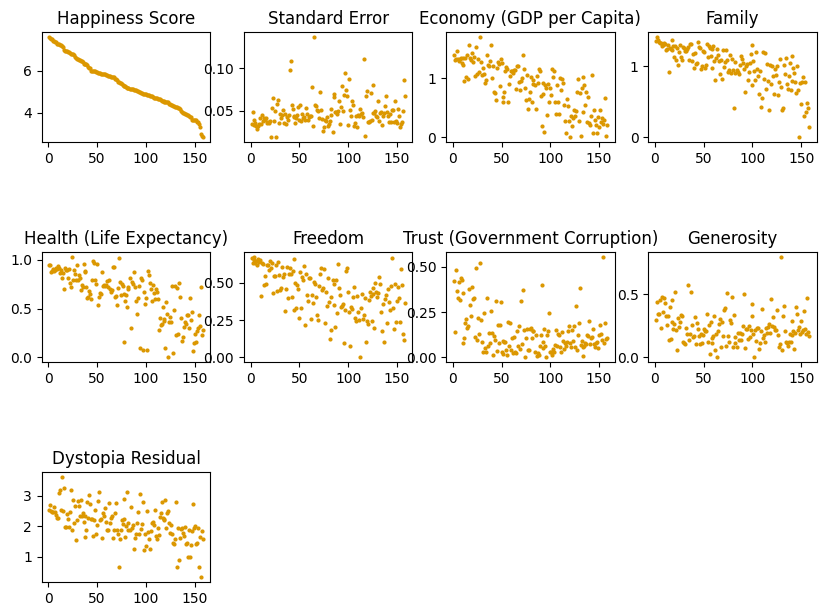

In [ ]:
plt.figure(figsize=(10,10))
plt.subplots_adjust(hspace=1)
for idx,column in enumerate(df_2015.columns[3:]):
    x = df_2015["Happiness Rank"]
    y = df_2015[column]
    plt.subplot(4,4,idx+1)
    plt.title(column)
    plt.scatter(x,y,color='#DB9700',s=4)

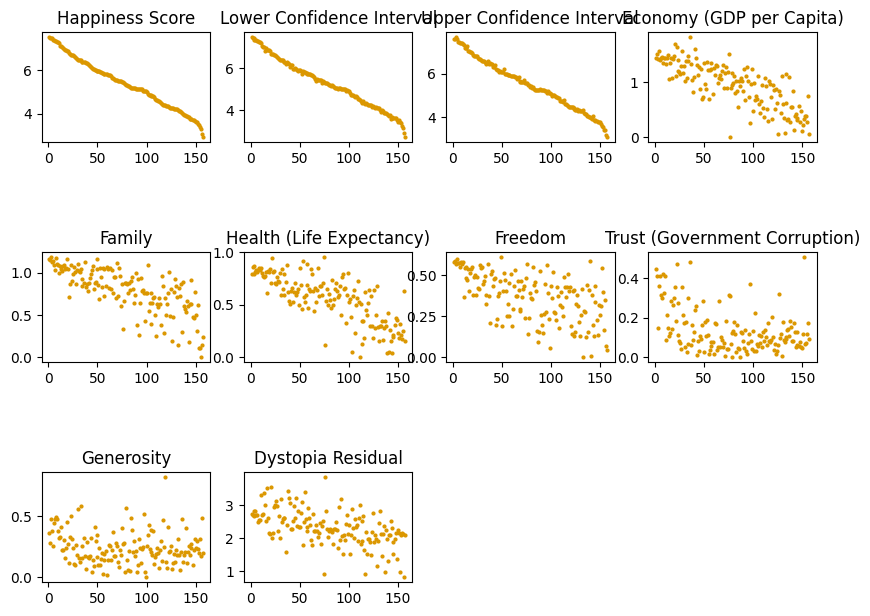

In [ ]:
plt.figure(figsize=(10,10))
plt.subplots_adjust(hspace=1)
year = df_2016
for idx,column in enumerate(year.columns[3:]):
    x = year["Happiness Rank"]
    y = year[column]
    plt.subplot(4,4,idx+1)
    plt.title(column)
    plt.scatter(x,y,color='#DB9700',s=4)

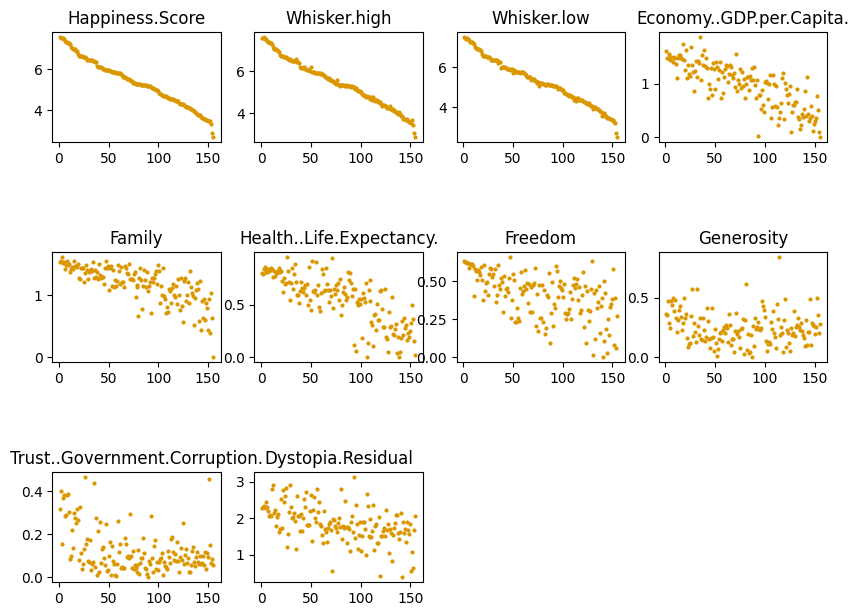

In [ ]:
plt.figure(figsize=(10,10))
plt.subplots_adjust(hspace=1)
year = df_2017
for idx,column in enumerate(year.columns[2:]):
    x = year["Happiness.Rank"]
    y = year[column]
    plt.subplot(4,4,idx+1)
    plt.title(column)
    plt.scatter(x,y,color='#DB9700',s=4)

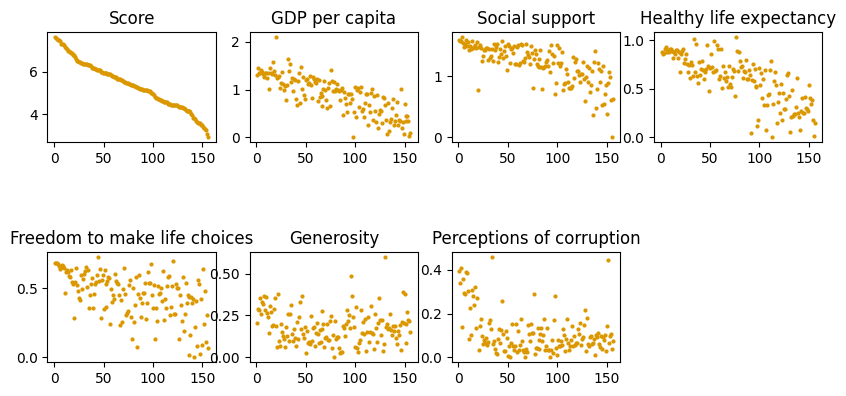

In [ ]:
plt.figure(figsize=(10,10))
plt.subplots_adjust(hspace=1)
# plt.subplots(constrained_layout=True)
year = df_2018
for idx,column in enumerate(year.columns[2:]):
    x = year["Overall rank"]
    y = year[column]
    plt.subplot(4,4,idx+1)
    plt.title(column)
    plt.scatter(x,y,color='#DB9700',s=4)

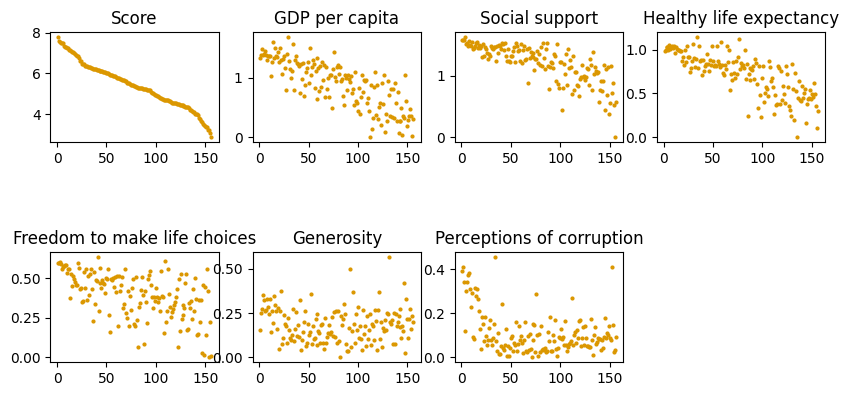

In [ ]:
plt.figure(figsize=(10,10))
plt.subplots_adjust(hspace=1)
# plt.subplots(constrained_layout=True)
year = df_2019
for idx,column in enumerate(year.columns[2:]):
    x = year["Overall rank"]
    y = year[column]
    plt.subplot(4,4,idx+1)
    plt.title(column)
    plt.scatter(x,y,color='#DB9700',s=4)

# **Data Cleaning**

In [ ]:
#Add Region Column
df_2017.loc[:, "Region"] = ""
df_2018.loc[:, "Region"] = ""
df_2019.loc[:, "Region"] = ""
def make_region(df_year):
    for idx,country in enumerate(df_year["Country"]):
        for region2 in df_2015["Country"]:
            if country == region2:
                df_year["Region"][idx] = df_2015[df_2015["Country"]==region2]["Region"].values[0]

In [ ]:
#Standarize and seperate Country and region columns
df_2018 = df_2018.rename(columns={"Country or region":"Country"},inplace=False)
df_2019 = df_2019.rename(columns={"Country or region":"Country"},inplace=False)

for year in [df_2017,df_2018,df_2019]:
    make_region(year)
df_2019.head()

<ipython-input-9-eeb4bd3ab02f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year["Region"][idx] = df_2015[df_2015["Country"]==region2]["Region"].values[0]


,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Region
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,Western Europe
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,Western Europe
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,Western Europe
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,Western Europe
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,Western Europe


In [ ]:
#Drop irrelevent columns
for  i in ["Standard Error","Family","Dystopia Residual"]:
    df_2015 = df_2015.drop(i,axis=1)

for  i in ["Lower Confidence Interval","Upper Confidence Interval","Family","Dystopia Residual"]:
    df_2016 = df_2016.drop(i,axis=1)

for  i in ["Whisker.high","Whisker.low","Family","Dystopia.Residual"]:
    df_2017 = df_2017.drop(i,axis=1)

for  i in ["Social support"]:
    df_2018 = df_2018.drop(i,axis=1)

df_2019 = df_2019.drop("Social support",axis=1)
df_2019.head()

,Overall rank,Country,Score,GDP per capita,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Region
0,1,Finland,7.769,1.340,0.986,0.596,0.153,0.393,Western Europe
1,2,Denmark,7.600,1.383,0.996,0.592,0.252,0.410,Western Europe
2,3,Norway,7.554,1.488,1.028,0.603,0.271,0.341,Western Europe
3,4,Iceland,7.494,1.380,1.026,0.591,0.354,0.118,Western Europe
4,5,Netherlands,7.488,1.396,0.999,0.557,0.322,0.298,Western Europe


In [ ]:
year_list = [df_2015,df_2016,df_2017,df_2018,df_2019]

for year in year_list:
    print(year.shape)

(158, 9)
(157, 9)
(155, 9)
(156, 9)
(156, 9)


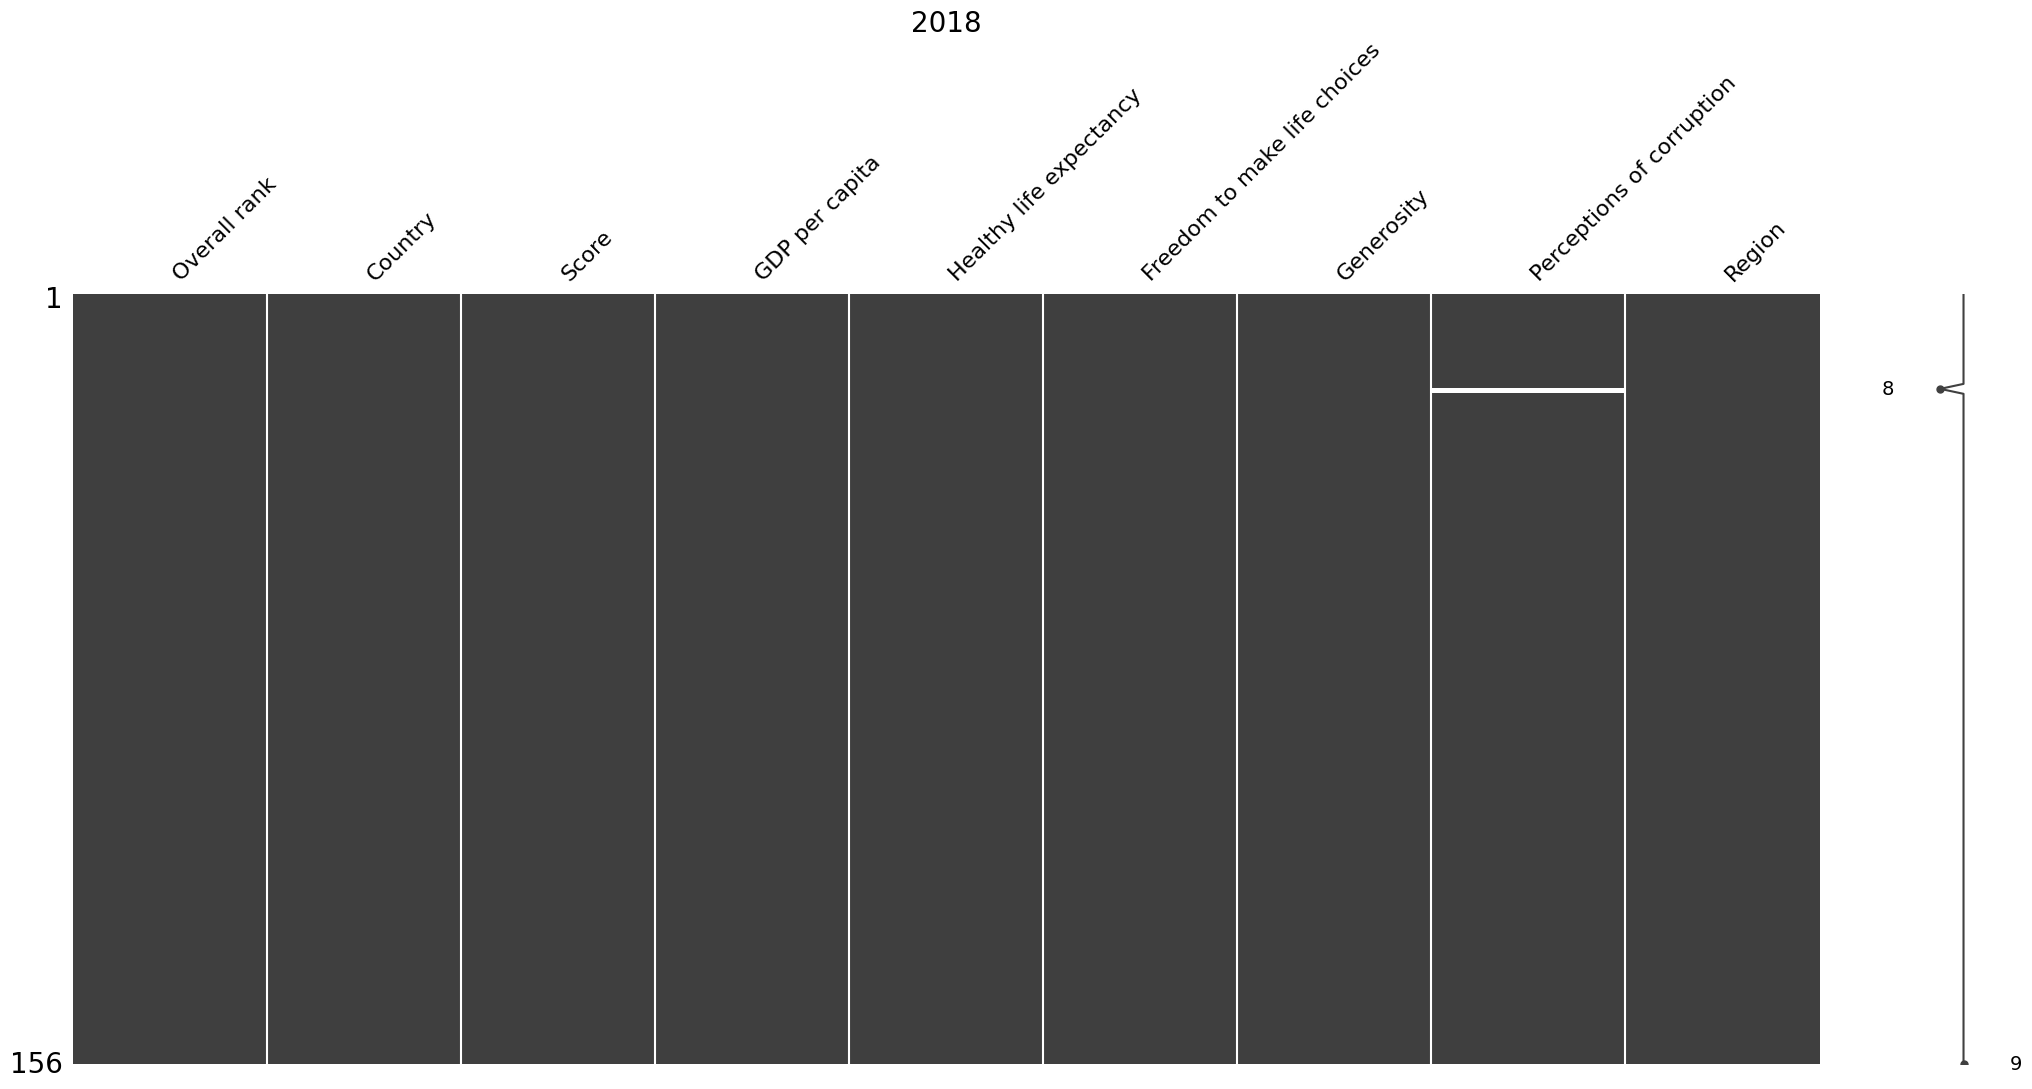

In [ ]:
#Check position od missing value
msno.matrix(df_2018)
plt.title(2018,size=20)
plt.show()

In [ ]:
a = np.mean(df_2018["Perceptions of corruption"].values[:19].tolist())
b = np.mean(df_2018["Perceptions of corruption"].values[20:39].tolist())
(a+b)/2

0.1903157894736842

In [ ]:
df_2018["Perceptions of corruption"] = df_2018["Perceptions of corruption"].fillna(0.19)

df_2017.columns = ["Country","Overall rank","Score","GDP per capita","Healthy life expectancy","Freedom to make life choices","Generosity","Perceptions of corruption","Region"]
df_2016.columns = ["Country","Region","Overall rank","Score","GDP per capita","Healthy life expectancy","Freedom to make life choices","Perceptions of corruption","Generosity"]
df_2015.columns = ["Country","Region","Overall rank","Score","GDP per capita","Healthy life expectancy","Freedom to make life choices","Perceptions of corruption","Generosity"]
df_2015 = df_2015[df_2019.columns.tolist()]
df_2016 = df_2016[df_2019.columns.tolist()]
df_2017 = df_2017[df_2019.columns.tolist()]
df_2018 = df_2018[df_2019.columns.tolist()]
if df_2015.columns.tolist() == df_2016.columns.tolist() == df_2017.columns.tolist() == df_2018.columns.tolist() == df_2019.columns.tolist():
    print("All columns are same")

All columns are same


In [ ]:
region_label = df_2017["Region"].value_counts().index.tolist()
region_label

['Sub-Saharan Africa',
 'Central and Eastern Europe',
 'Western Europe',
 'Latin America and Caribbean',
 'Middle East and Northern Africa',
 'Southeastern Asia',
 'Southern Asia',
 '',
 'Eastern Asia',
 'North America',
 'Australia and New Zealand']

In [ ]:
# Find out missing value's location
emt_17 = []
emt_18 = []
emt_19 = []
for idx, df in enumerate([df_2015,df_2016,df_2017,df_2018,df_2019]):
    print("<<",idx+2015,">>","\n",df[df["Region"]==""]["Country"])
    if idx == 2:
        emt_17.append(df[df["Region"]==""]["Country"].index.tolist())
    elif idx == 3:
        emt_18.append(df[df["Region"]==""]["Country"].index.tolist())
    elif idx == 4:
        emt_19.append(df[df["Region"]==""]["Country"].index.tolist())

# fill data according to 2016 data
for idx,emt in enumerate([emt_17,emt_18,emt_19]):
    print(idx+2017)
    for df_year in [df_2017,df_2018,df_2019]:
        for i in emt[0]:
            if len(df_2016[df_2016["Country"]==df_2017[df_2017["Overall rank"] == i]["Country"].values[0]]["Region"].values) ==1:
                df_year["Region"][i] = df_2016[df_2016["Country"]==df_2017[df_2017["Overall rank"] == i]["Country"].values[0]]["Region"].values[0]


<< 2015 >> 
 Series([], Name: Country, dtype: object)
<< 2016 >> 
 Series([], Name: Country, dtype: object)
<< 2017 >> 
 32     Taiwan Province of China
49                       Belize
70      Hong Kong S.A.R., China
92                      Somalia
110                     Namibia
146                 South Sudan
Name: Country, dtype: object
<< 2018 >> 
 37     Trinidad & Tobago
48                Belize
57       Northern Cyprus
97               Somalia
118              Namibia
153          South Sudan
Name: Country, dtype: object
<< 2019 >> 
 38     Trinidad & Tobago
63       Northern Cyprus
83       North Macedonia
111              Somalia
112              Namibia
119               Gambia
155          South Sudan
Name: Country, dtype: object
2017
2018
2019


<ipython-input-17-1ecf3f001f6c>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year["Region"][i] = df_2016[df_2016["Country"]==df_2017[df_2017["Overall rank"] == i]["Country"].values[0]]["Region"].values[0]


In [ ]:
# Find out missing value's location
emt_17 = []
emt_18 = []
emt_19 = []
for idx, df in enumerate([df_2015,df_2016,df_2017,df_2018,df_2019]):
    print("<<",idx+2015,">>","\n",df[df["Region"]==""]["Country"])
    if idx == 2:
        emt_17.append(df[df["Region"]==""]["Country"].index.tolist())
    elif idx == 3:
        emt_18.append(df[df["Region"]==""]["Country"].index.tolist())
    elif idx == 4:
        emt_19.append(df[df["Region"]==""]["Country"].index.tolist())

<< 2015 >> 
 Series([], Name: Country, dtype: object)
<< 2016 >> 
 Series([], Name: Country, dtype: object)
<< 2017 >> 
 Series([], Name: Country, dtype: object)
<< 2018 >> 
 Series([], Name: Country, dtype: object)
<< 2019 >> 
 155    South Sudan
Name: Country, dtype: object


In [ ]:
#Show missing region values
df_2019["Region"].value_counts()

Sub-Saharan Africa                 39
Central and Eastern Europe         29
Middle East and Northern Africa    21
Western Europe                     20
Latin America and Caribbean        20
Southeastern Asia                  10
Southern Asia                       8
Eastern Asia                        4
Australia and New Zealand           2
North America                       2
                                    1
Name: Region, dtype: int64

In [ ]:
#Add missing region
df_2019["Region"][155] = "Middle East and Northern Africa"

<ipython-input-20-3f7dc7c1c30c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019["Region"][155] = "Middle East and Northern Africa"


In [ ]:
# Find out missing value's location
emt_17 = []
emt_18 = []
emt_19 = []
for idx, df in enumerate([df_2015,df_2016,df_2017,df_2018,df_2019]):
    print("<<",idx+2015,">>","\n",df[df["Region"]==""]["Country"])
    if idx == 2:
        emt_17.append(df[df["Region"]==""]["Country"].index.tolist())
    elif idx == 3:
        emt_18.append(df[df["Region"]==""]["Country"].index.tolist())
    elif idx == 4:
        emt_19.append(df[df["Region"]==""]["Country"].index.tolist())

<< 2015 >> 
 Series([], Name: Country, dtype: object)
<< 2016 >> 
 Series([], Name: Country, dtype: object)
<< 2017 >> 
 Series([], Name: Country, dtype: object)
<< 2018 >> 
 Series([], Name: Country, dtype: object)
<< 2019 >> 
 Series([], Name: Country, dtype: object)


# **Obtaining Train and Test Data**

In [ ]:
X = pd.concat([df_2015,df_2016,df_2017,df_2018])
X = X.reset_index(drop=True)
test = df_2019
y = pd.DataFrame(X["Score"])
test_y = pd.DataFrame(test["Score"])
X = X.drop("Overall rank",axis=1)
X = X.drop("Score",axis = 1)
test = test.drop("Overall rank",axis=1)
test = test.drop("Score",axis = 1)
num_val_samples = len(X) // 4

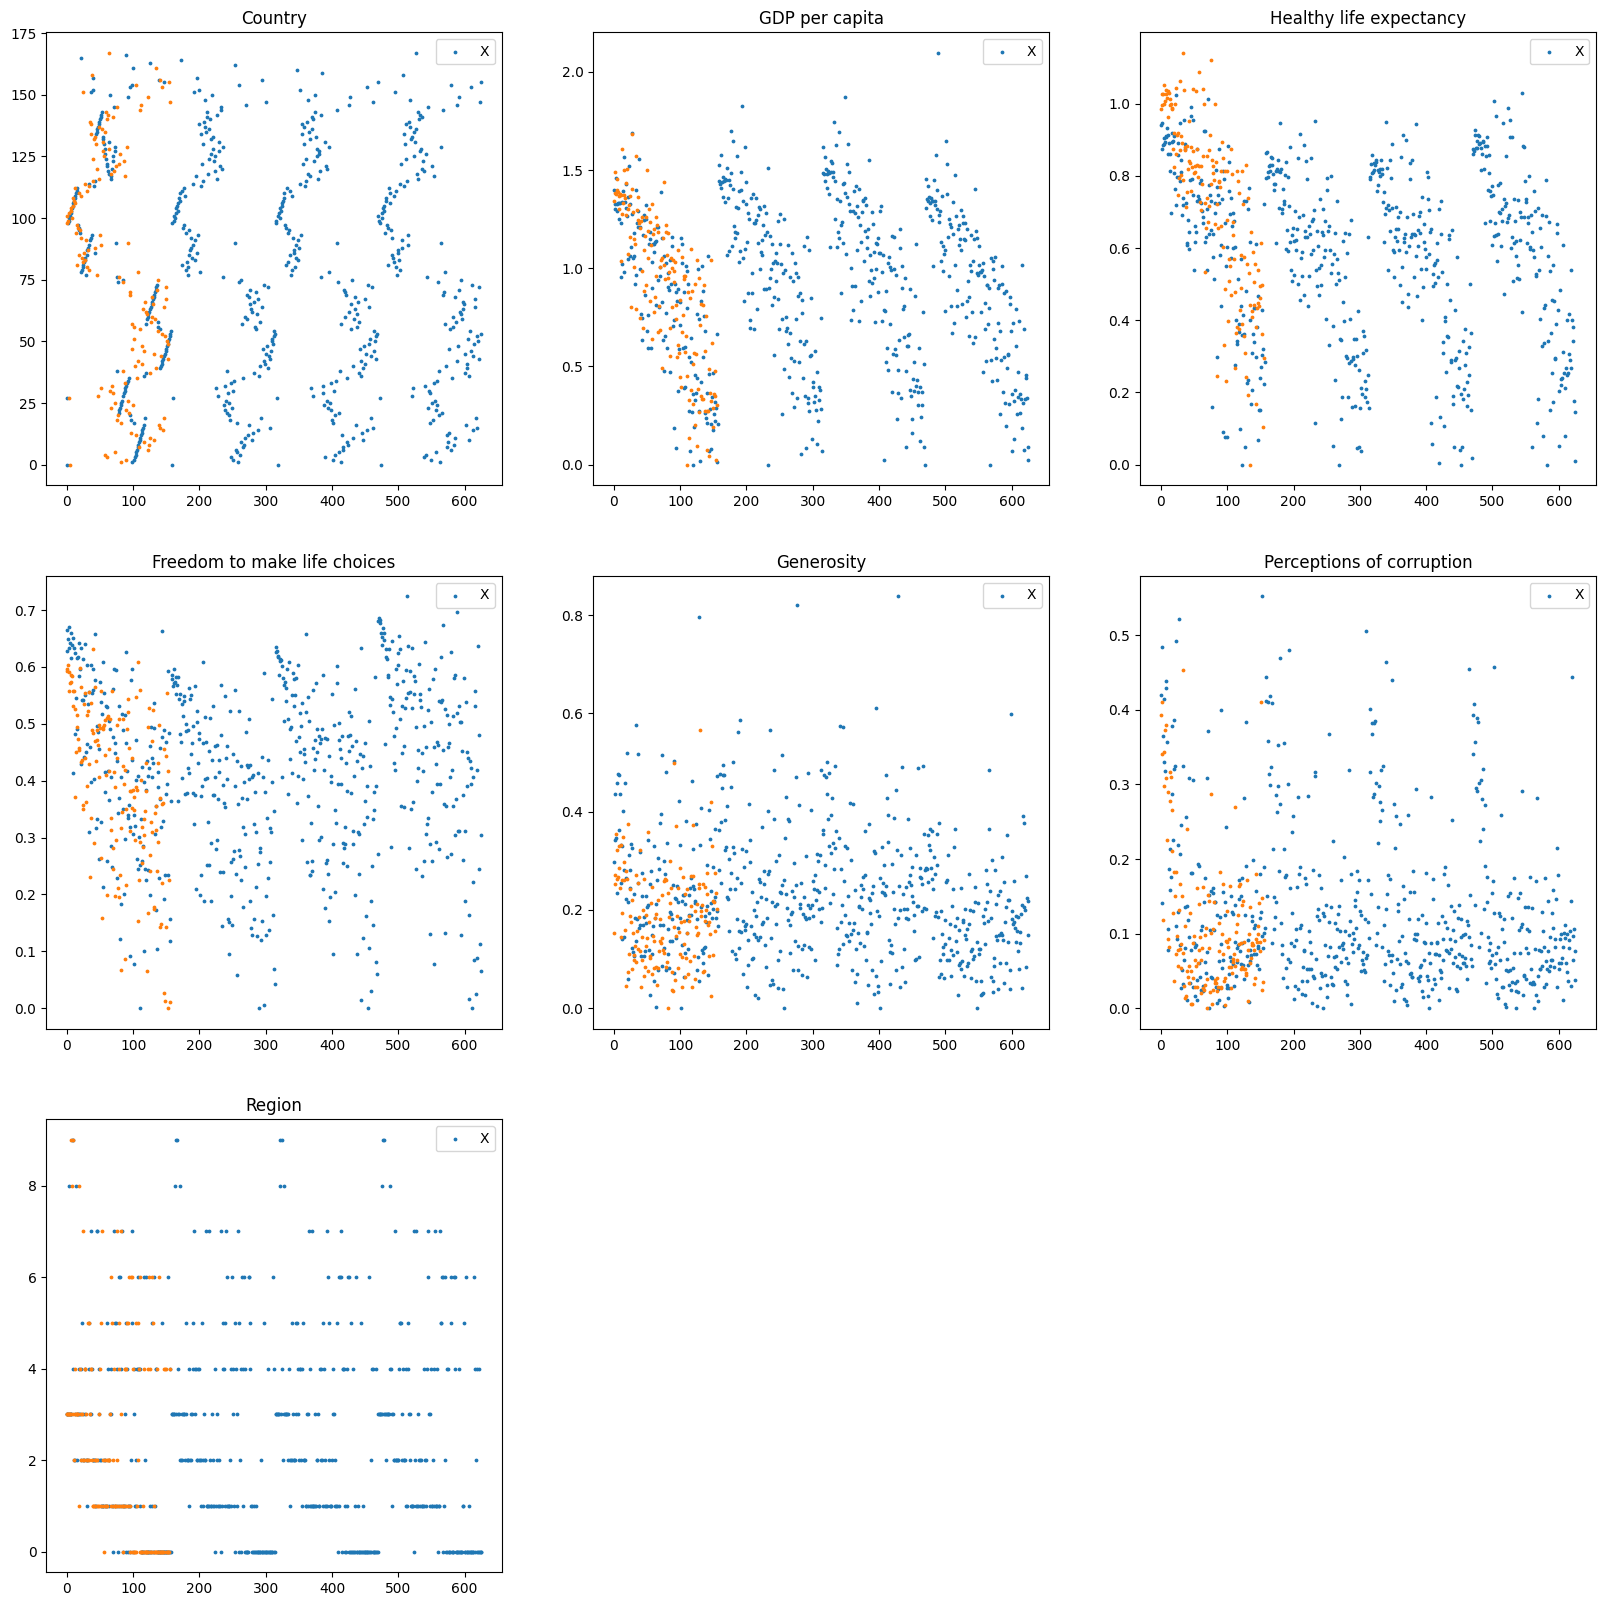

In [ ]:
all_datasets = {"X":X,"test":test}
country_label = X["Country"].value_counts().index.tolist()
country_labels_map = {label: rank for rank, label in enumerate(country_label)}
region_label = X["Region"].value_counts().index.tolist()
region_label_map = {label: rank for rank, label in enumerate(region_label)}
for dataset in all_datasets.values():
    dataset["Country"] = dataset["Country"].map(country_labels_map)
    dataset["Region"] = dataset["Region"].map(region_label_map)    
plt.figure(figsize=(20,20))
for i,df in enumerate([X,test]):
    for idx,column in enumerate(df.columns):
        x = df.index
        y1 = df[column]
        plt.subplot(3,3,idx+1)
        plt.legend(("X","test"))
        plt.title(column)
        plt.scatter(x,y1,s=3)

<Axes: title={'center': 'Correlation of Features'}>

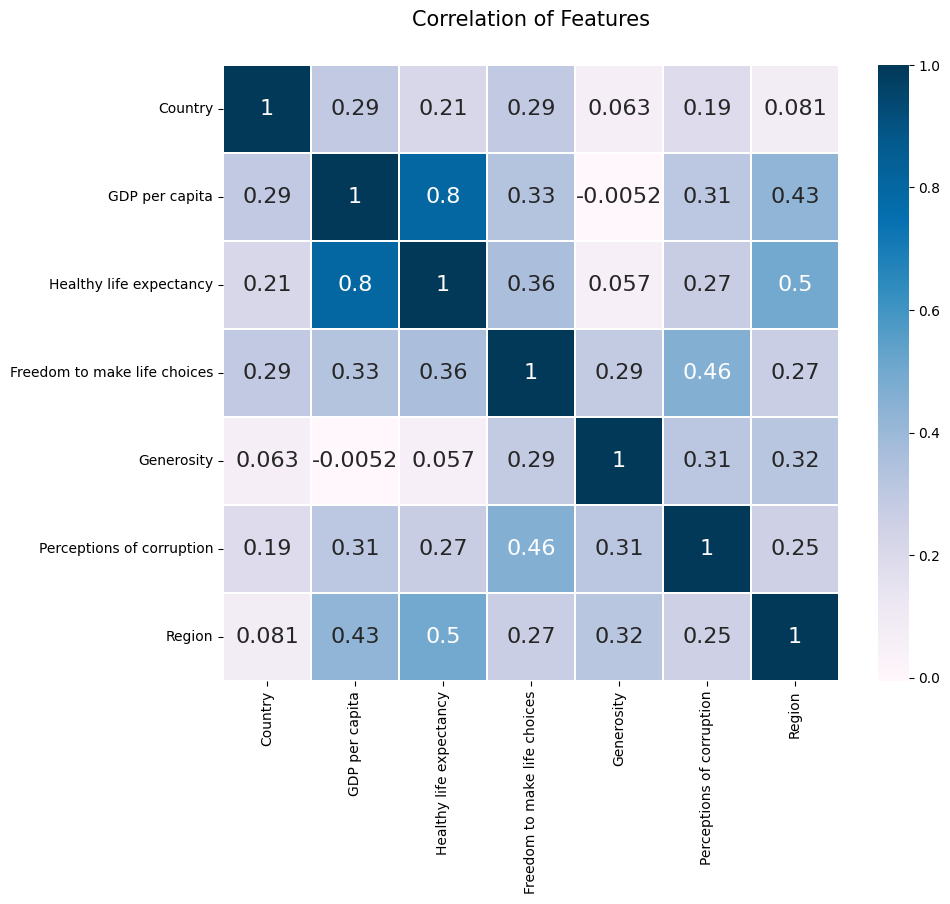

In [ ]:
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("Correlation of Features", y = 1.05, size = 15)
sns.heatmap(X.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

In [ ]:
test["Country"][83] = 34
test["Country"][119] = 162

<ipython-input-25-21ff522ee36d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Country"][83] = 34
<ipython-input-25-21ff522ee36d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Country"][119] = 162


# **Predicting Using Multiple Models**

---

Display Accuracy using R2-score & MSE

Display Partial Dependence Graph

XGBRegressor

R2score: 0.8515940647426015 Mean Squared Error: 0.18270155329642493


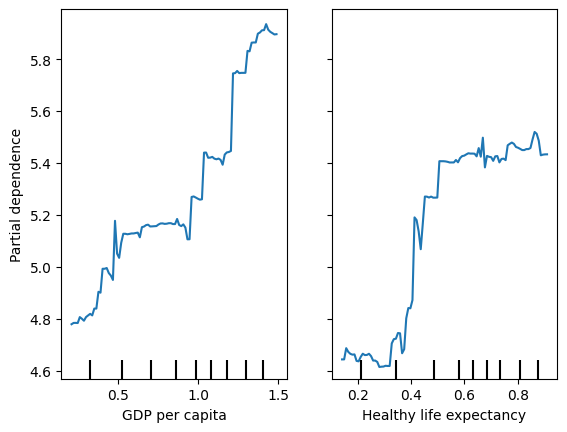

In [ ]:
m1 = XGBRegressor().fit(X, y)
p_m1 = m1.predict(test)
print('R2score:', r2_score(test_y,p_m1),'Mean Squared Error:', mean_squared_error(test_y,p_m1))
PartialDependenceDisplay.from_estimator(m1, X, [1, 2])

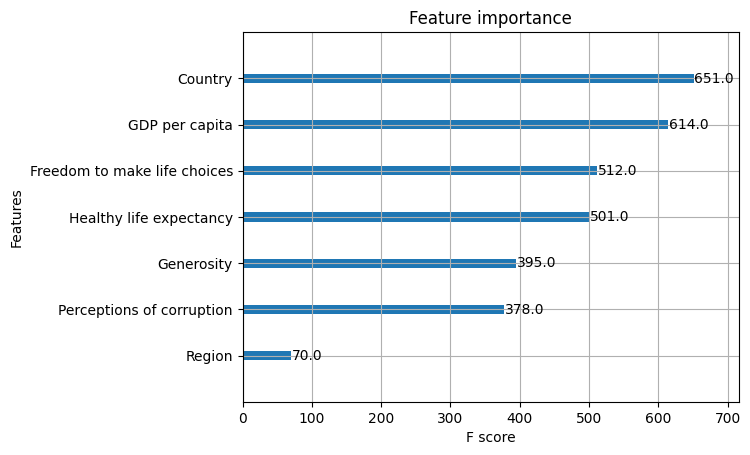

<Figure size 1600x1200 with 0 Axes>

In [ ]:
#Feature Importance
xgb.plot_importance(m1)
plt.figure(figsize = (16, 12))
plt.show()

Cat Boost Regressor

Learning rate set to 0.038022
0:	learn: 1.1003562	total: 2.68ms	remaining: 2.68s
1:	learn: 1.0703545	total: 9.68ms	remaining: 4.83s
2:	learn: 1.0415656	total: 13.4ms	remaining: 4.46s
3:	learn: 1.0139102	total: 16ms	remaining: 3.99s
4:	learn: 0.9895797	total: 20.6ms	remaining: 4.09s
5:	learn: 0.9650132	total: 22.9ms	remaining: 3.79s
6:	learn: 0.9408567	total: 27.1ms	remaining: 3.84s
7:	learn: 0.9156884	total: 31.2ms	remaining: 3.86s
8:	learn: 0.8941046	total: 35.2ms	remaining: 3.88s
9:	learn: 0.8711856	total: 39.5ms	remaining: 3.91s
10:	learn: 0.8513041	total: 43.6ms	remaining: 3.92s
11:	learn: 0.8322291	total: 47.9ms	remaining: 3.94s
12:	learn: 0.8130498	total: 52.2ms	remaining: 3.96s
13:	learn: 0.7947885	total: 56ms	remaining: 3.95s
14:	learn: 0.7763931	total: 60.2ms	remaining: 3.95s
15:	learn: 0.7588465	total: 64.4ms	remaining: 3.96s
16:	learn: 0.7412552	total: 68.7ms	remaining: 3.97s
17:	learn: 0.7259758	total: 72.7ms	remaining: 3.96s
18:	learn: 0.7111634	total: 76.8ms	remaining: 3.

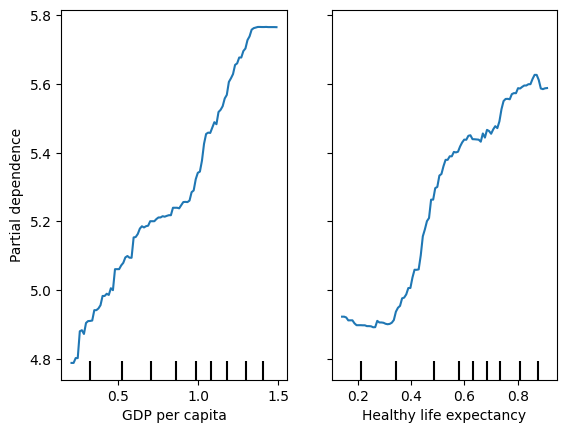

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
m2 = CatBoostRegressor().fit(X,y)
p_m2 = m2.predict(test)
print('R2score: ', r2_score(test_y, p_m2),'Mean Squared Error:', mean_squared_error(test_y, p_m2))
PartialDependenceDisplay.from_estimator(m2, X, [1, 2])

Text(0.5, 1.0, 'Feature Importance')

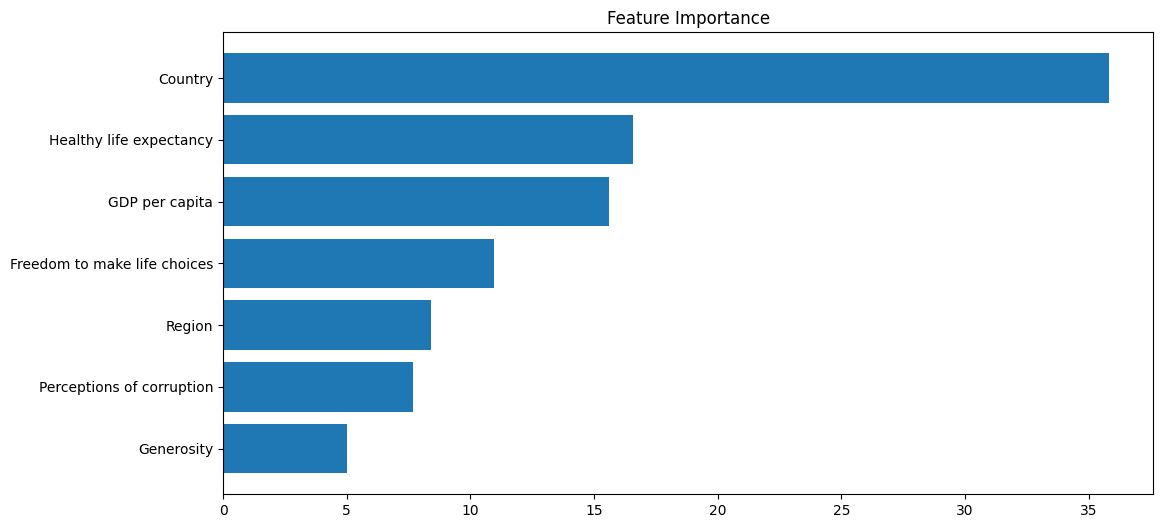

In [ ]:
#Feature Importance
feature_importance = m2.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(test.columns)[sorted_idx])
plt.title('Feature Importance')

Hist Gradient Boosting Regressor

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


R2score:  0.874089755279542 Mean Squared Error: 0.15500725928826248


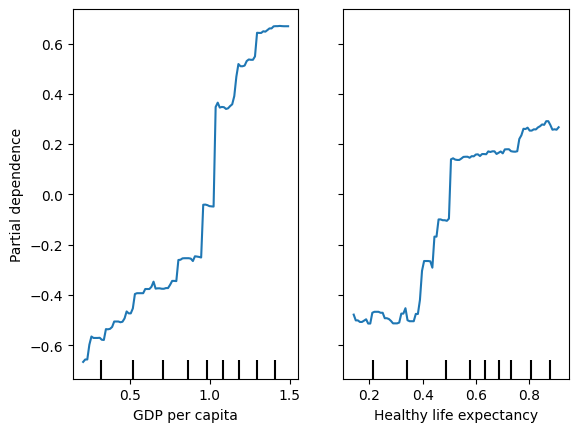

In [ ]:
m3 = HistGradientBoostingRegressor().fit(X, y)
p_m3 = m3.predict(test)
print('R2score: ', r2_score(test_y, p_m3),'Mean Squared Error:', mean_squared_error(test_y, p_m3))
PartialDependenceDisplay.from_estimator(m3, X, [1, 2])

Random Forest Regressor

<ipython-input-54-2a42c96e6907>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  m4 = RandomForestRegressor().fit(X, y)


R2score:  0.8636406416112099 Mean Squared Error: 0.16787109316703597


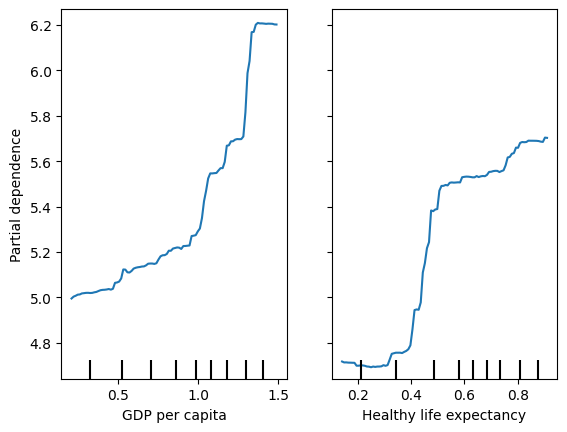

In [ ]:
m4 = RandomForestRegressor().fit(X, y)
p_m4 = m4.predict(test)
print('R2score: ', r2_score(test_y, p_m4),'Mean Squared Error:', mean_squared_error(test_y, p_m4))
PartialDependenceDisplay.from_estimator(m4, X, [1, 2])

<Axes: >

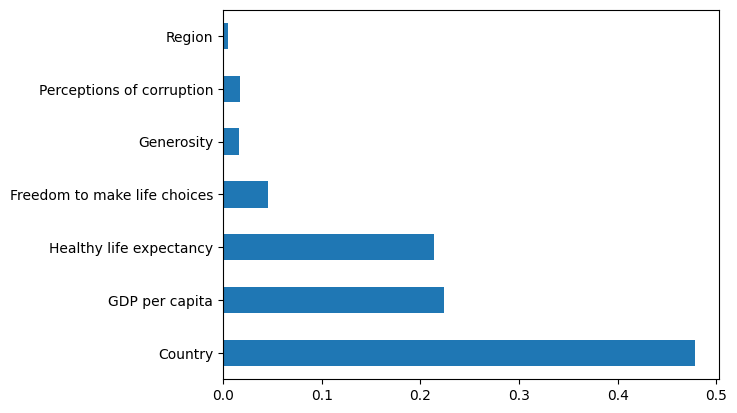

In [ ]:
#Feature Importance
feat_importances = pd.Series(m4.feature_importances_, index=X.columns)
feat_importances.plot(kind='barh')

Linear Regression

R2score:  0.7432528611452469 Mean Squared Error: 0.3160796836852775


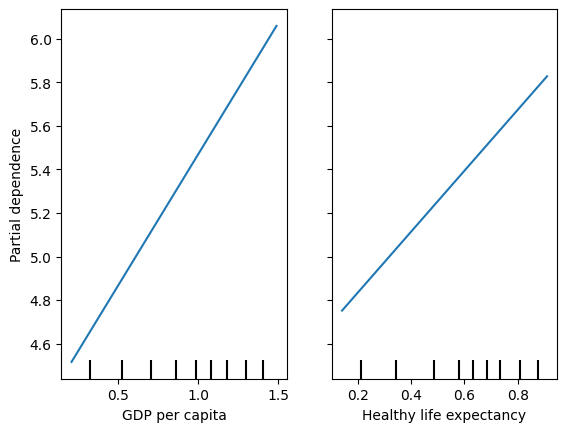

In [ ]:
m5 = LinearRegression().fit(X, y)
p_m5 = m5.predict(test)
print('R2score: ', r2_score(test_y, p_m5),'Mean Squared Error:', mean_squared_error(test_y, p_m5))
PartialDependenceDisplay.from_estimator(m5, X, [1, 2])

Feature: 0, Score: 0.00362
Feature: 1, Score: 1.20510
Feature: 2, Score: 1.40040
Feature: 3, Score: 1.66389
Feature: 4, Score: 0.56953
Feature: 5, Score: 0.51109
Feature: 6, Score: -0.02503


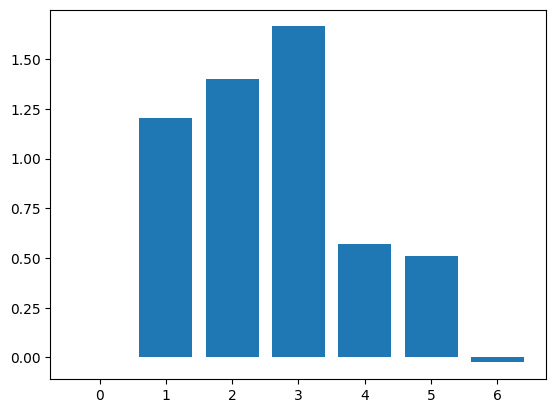

,Country,GDP per capita,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Region
0,101.0,1.34,0.986,0.596,0.153,0.393,3


In [ ]:
#Feature Importance
importance = m5.coef_[0]
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(importance))], importance)
plt.show()
test.head(1)